In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [29]:
dataframe=pd.read_csv("creditcard.csv")



In [40]:
# Distribution graphs (histogram/bar graph) of column data
import math
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nCol = df.shape[1]  # Get the number of columns
    nGraphRow = math.ceil(nCol / nGraphPerRow)  # Calculate rows, but ensure it's an integer
    
    # Ensure nGraphRow is an integer
    nGraphRow = int(nGraphRow)
    
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):  # Check if column is numeric
            columnDf = columnDf.value_counts()
        plt.hist(columnDf)
        plt.title(df.columns[i])

    plt.tight_layout()
    plt.show()

In [33]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna(axis='columns')  # Drop columns with NaNs
    df = df[[col for col in df if df[col].nunique() > 1]]  # Keep columns with more than 1 unique value

    if df.shape[1] < 2:
        print("Not enough columns for correlation matrix.")
        return

    corr = df.corr()

    fig, ax = plt.subplots(figsize=(graphWidth, graphWidth))
    ax.matshow(corr, cmap='coolwarm')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

In [43]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [15]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# creditcard.csv has 284807 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('creditcard.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


In [16]:
df1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


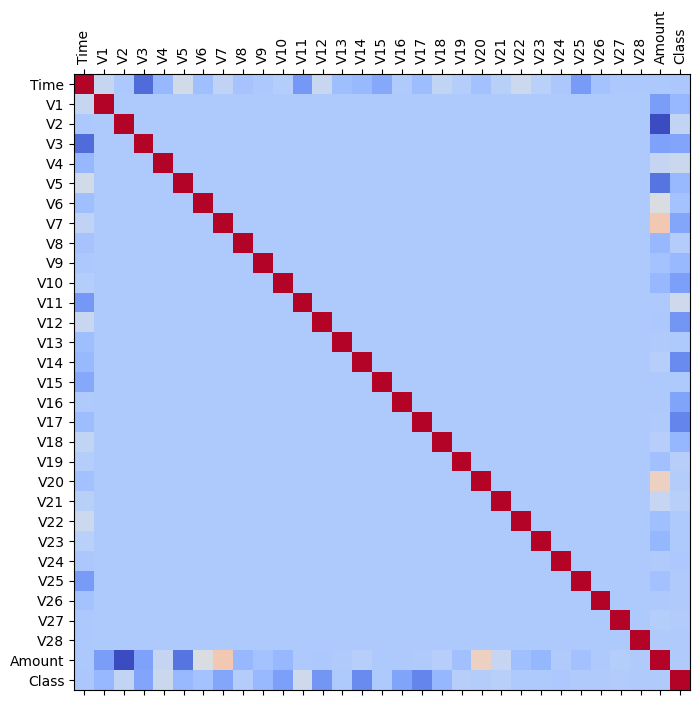

In [35]:
plotCorrelationMatrix(df, 8)

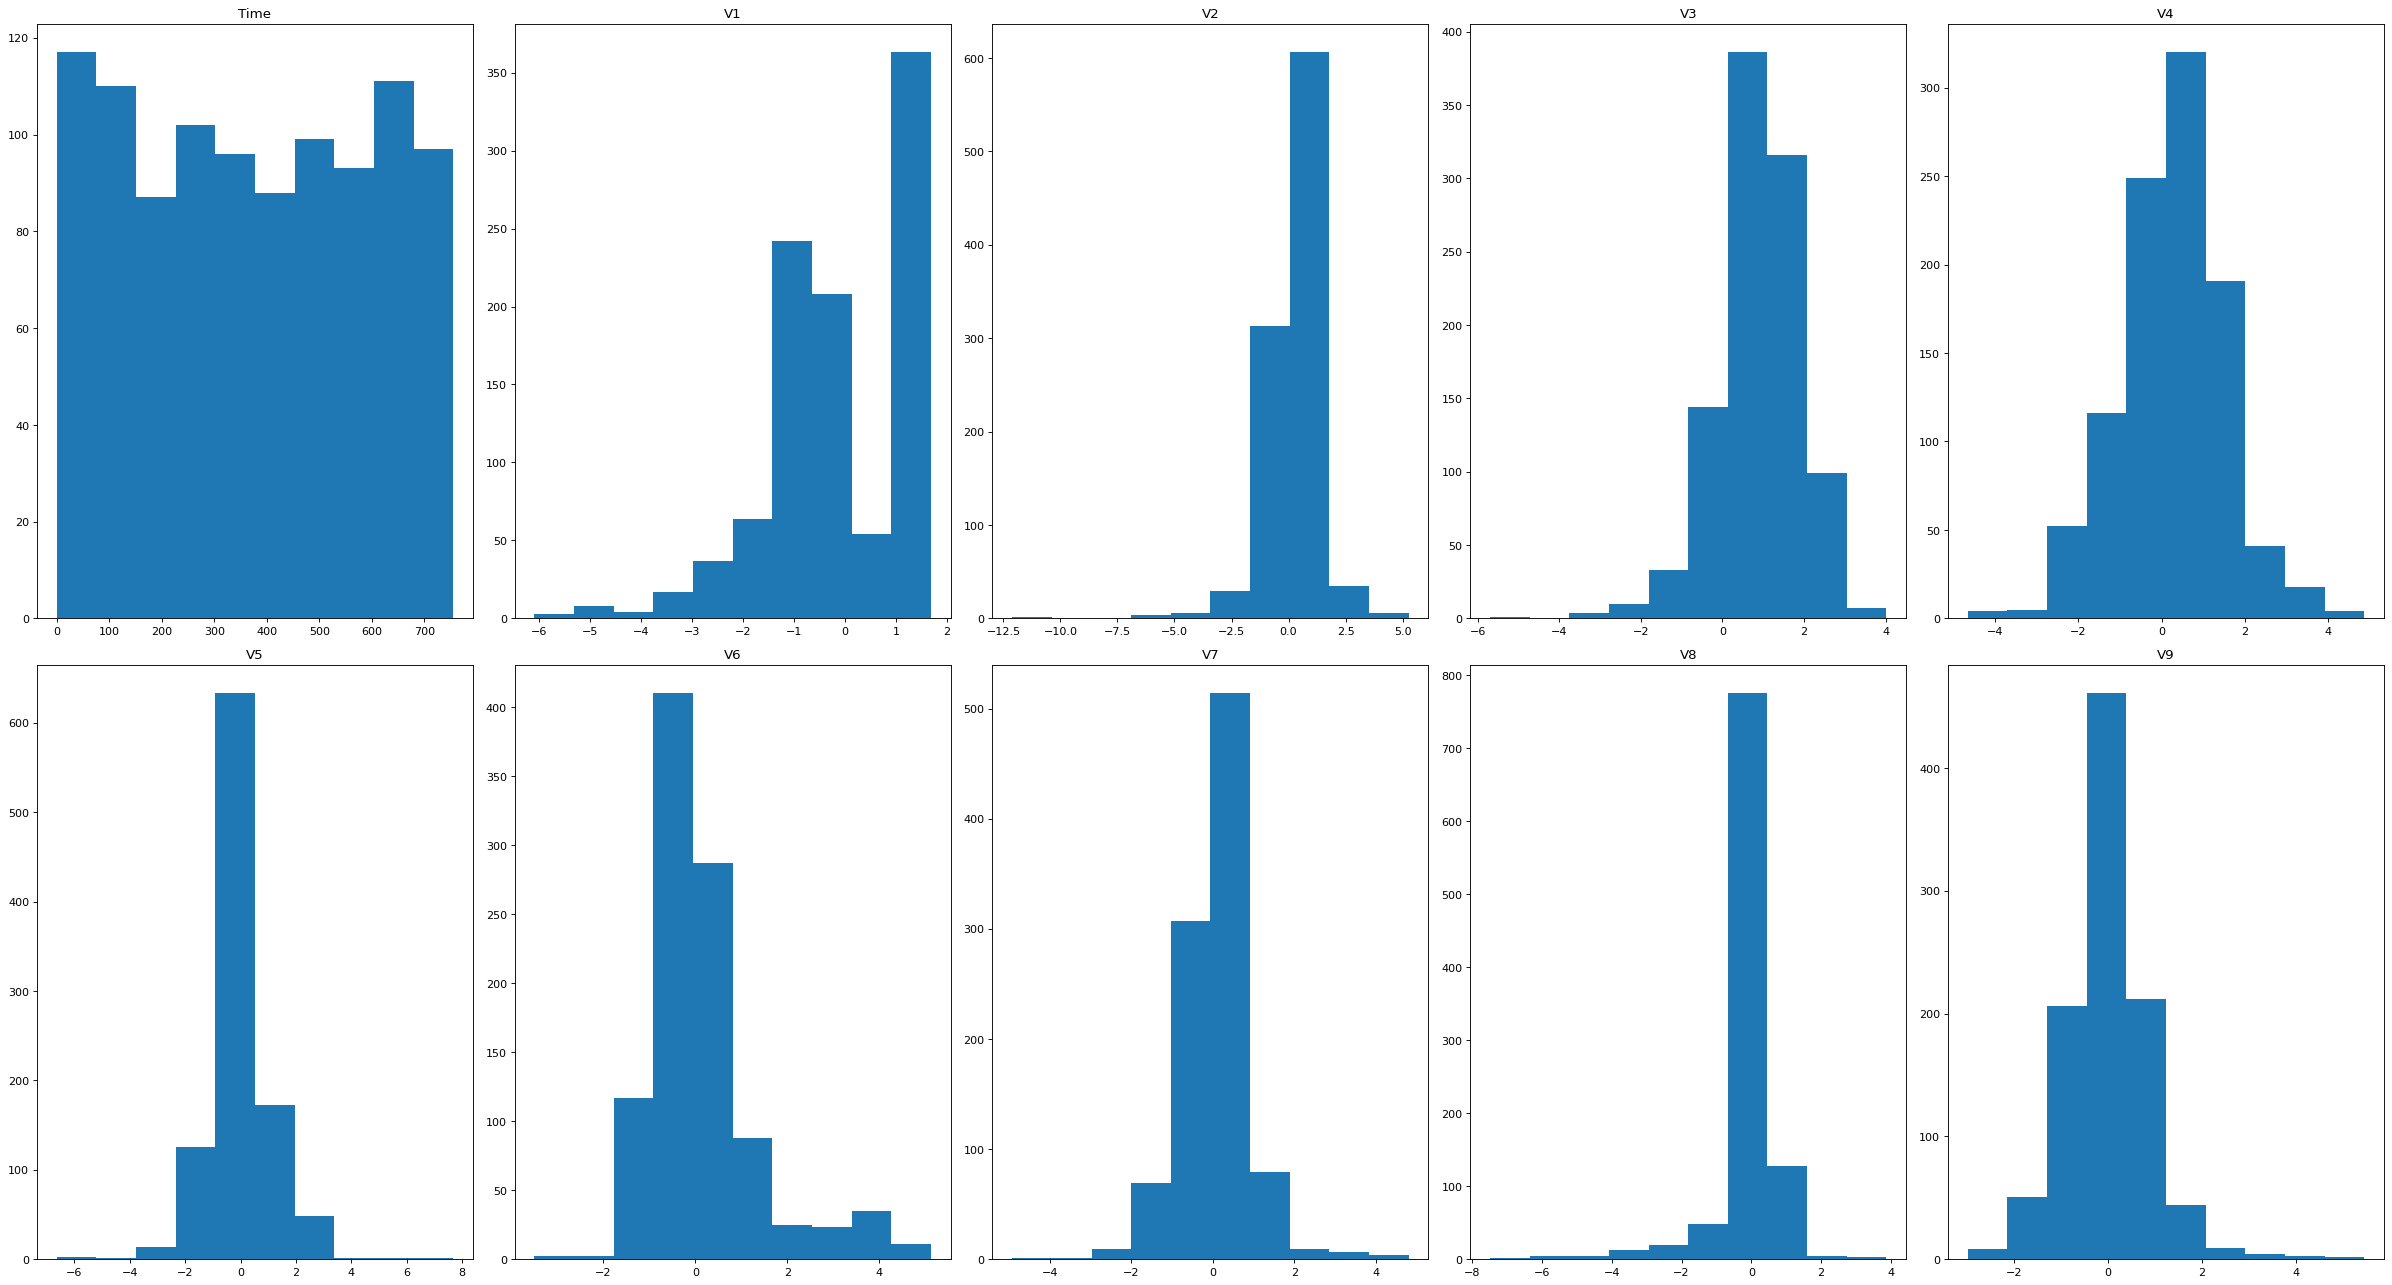

In [41]:
plotPerColumnDistribution(df1, 10, 5)

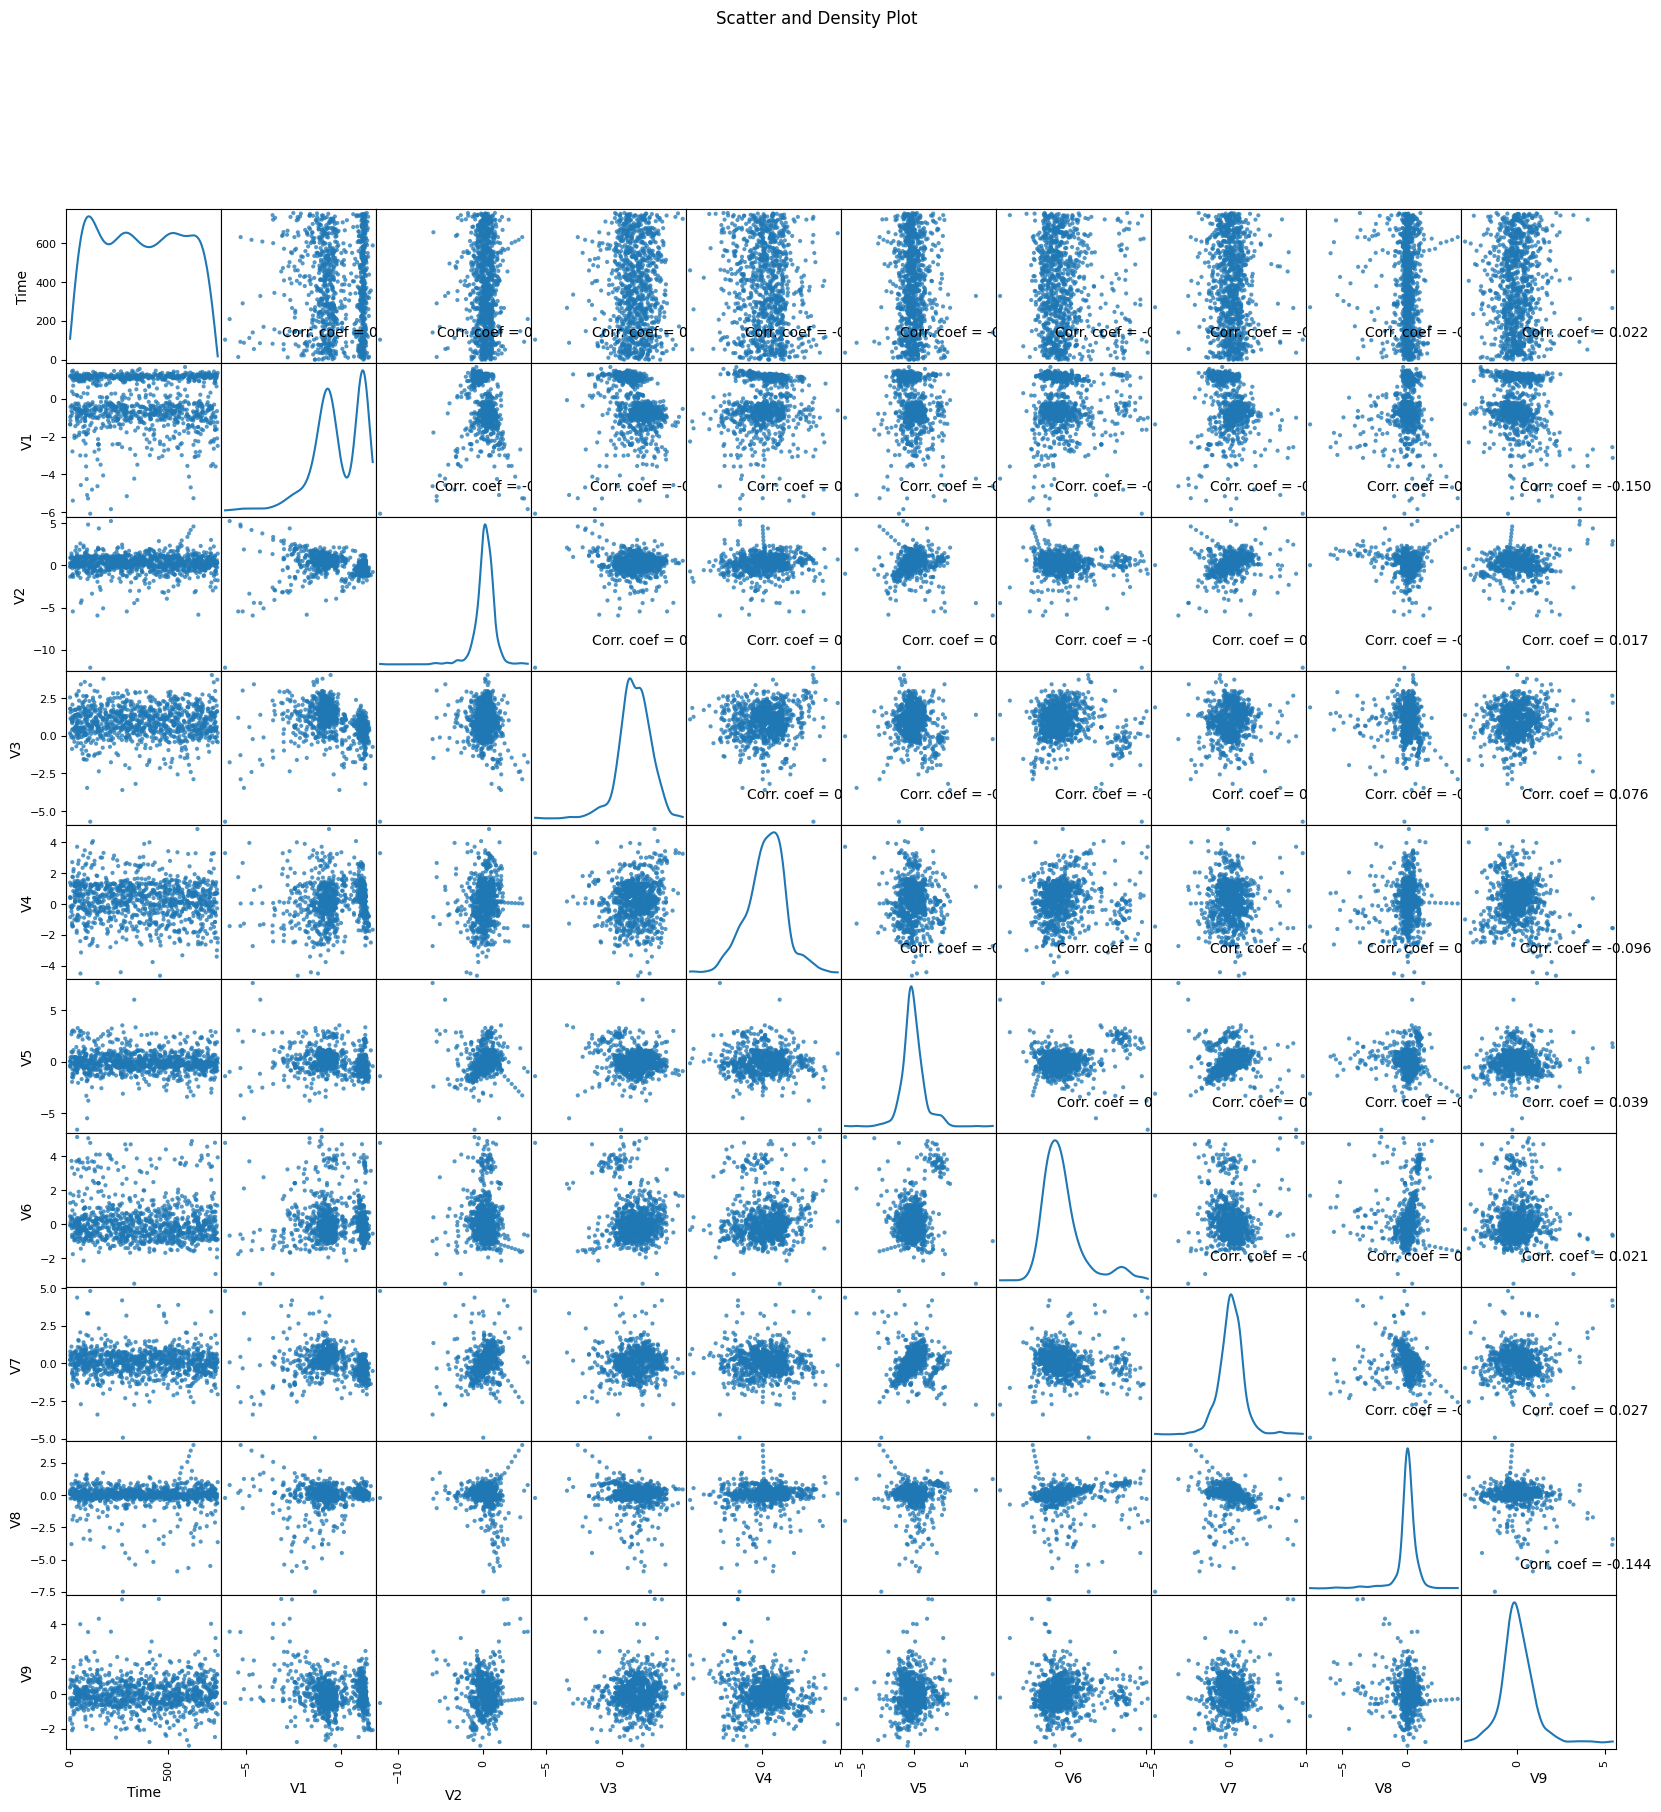

In [44]:
plotScatterMatrix(df1, 20, 10)
